In [52]:
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, Normalizer, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

import plotly.graph_objects as go
from plotly.subplots import make_subplots 
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
from wordcloud import WordCloud

In [2]:
df_artists = pd.read_csv('artists.csv', index_col='artist', converters={'genres': literal_eval, 'albums': literal_eval,
                                                                        'related_artists':literal_eval, 'related_genres':literal_eval})

## Data wrangling

Impute empty genres with related genres

In [3]:
df_artists.loc[df_artists['genres'].apply(lambda x: len(x) == 0), 'genres'] = df_artists['related_genres']

In [4]:
mlb = MultiLabelBinarizer()
mlb.fit(df_artists['genres'])

MultiLabelBinarizer(classes=None, sparse_output=False)

One-hot encode genres

In [5]:
df_genres = pd.DataFrame(data=mlb.transform(df_artists['genres']), 
                         columns=['genre: {}'.format(genre) for genre in mlb.classes_],
                         index=df_artists.index)

In [6]:
df_artists = df_artists.join(df_genres)
df_artists.head()

artist_id  followers  \
artist                                                       
Travis Scott             0Y5tJX1MQlPlqiwlOH1tJY    7705985   
Martin Garrix            60d24wfXkVzDSfLS6hyCjZ   12574151   
Los Fabulosos Cadillacs  2FS22haX3FYbyOsUAkuYqZ    1672897   
Brockhampton             1Bl6wpkWCQ4KVgnASpvzzA    1186410   
DUKI                     1bAftSH8umNcGZ0uyV7LMg    2715207   

                                                                    genres  \
artist                                                                       
Travis Scott                                                         [rap]   
Martin Garrix            [big room, edm, pop, progressive house, tropic...   
Los Fabulosos Cadillacs  [argentine rock, latin alternative, latin rock...   
Brockhampton                                 [boy band, hip hop, pop, rap]   
DUKI                                   [argentine hip hop, trap argentino]   

                         popularity  \
artist                                
Travis Scott                     98   
Martin Garrix                    88   
Los Fabulosos Cadillacs          73   
Brockhampton                     85   
DUKI                             84   

                                                                    albums  \
artist                                                                       
Travis Scott             {'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...   
Martin Garrix            {'2019-07-10': 'The Martin Garrix Experience',...   
Los Fabulosos Cadillacs  {'2017-10-20': 'En Vivo en The Theater at Madi...   
Brockhampton             {'2019-08-23': 'GINGER', '2018-09-21': 'irides...   
DUKI                     {'2019-11-01': 'Súper Sangre Joven', '2020-01-...   

                                                                top_tracks  \
artist                                                                       
Travis Scott             ['3eekarcy7kvN4yt5ZFzltW', '7h0d2h0fUmzbs7zeFi...   
Martin Garrix            ['7Feaw9WAEREY0DUOSXJLOM', '7pWK1kMgHy5lNNiIfu...   
Los Fabulosos Cadillacs  ['198qSChSMQFuSimdeeY9gK', '7d4pdMym8ZBOgf1oVP...   
Brockhampton             ['6U0FIYXCQ3TGrk4tFpLrEA', '0dWOFwdXrbBUYqD9DL...   
DUKI                     ['57kdZIOAaolxAjB67d2yU3', '2ECIwi1a7mfokdDkkJ...   

                                                           related_artists  \
artist                                                                       
Travis Scott             [A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...   
Martin Garrix            [AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...   
Los Fabulosos Cadillacs  [Los Pericos, Vicentico, Aterciopelados, Los A...   
Brockhampton             [Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...   
DUKI                     [Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...   

                                                            related_genres  \
artist                                                                       
Travis Scott             [east coast hip hop, hip hop, pop rap, rap, tr...   
Martin Garrix            [big room, edm, big room, deep big room, edm, ...   
Los Fabulosos Cadillacs  [argentine reggae, argentine rock, latin alter...   
Brockhampton             [alternative r&b, hip hop, lgbtq+ hip hop, rap...   
DUKI                     [argentine hip hop, trap argentino, argentine ...   

                         day  genre: alternative r&b  ...  \
artist                                                ...   
Travis Scott               1                       0  ...   
Martin Garrix              1                       0  ...   
Los Fabulosos Cadillacs    1                       0  ...   
Brockhampton               1                       0  ...   
DUKI                       1                       0  ...   

                         genre: trap argentino  genre: trap chileno  \
artist                                                                
Travis Scott            

One-hot encode related artists

In [7]:
mlb.fit(df_artists['related_artists'])
df_related_artists = pd.DataFrame(data=mlb.transform(df_artists['related_artists']), 
                                  columns=['related_artist: {}'.format(related_artist) for related_artist in mlb.classes_],
                                  index=df_artists.index)

In [8]:
df_artists = df_artists.join(df_related_artists)
df_artists.head()

artist_id  followers  \
artist                                                       
Travis Scott             0Y5tJX1MQlPlqiwlOH1tJY    7705985   
Martin Garrix            60d24wfXkVzDSfLS6hyCjZ   12574151   
Los Fabulosos Cadillacs  2FS22haX3FYbyOsUAkuYqZ    1672897   
Brockhampton             1Bl6wpkWCQ4KVgnASpvzzA    1186410   
DUKI                     1bAftSH8umNcGZ0uyV7LMg    2715207   

                                                                    genres  \
artist                                                                       
Travis Scott                                                         [rap]   
Martin Garrix            [big room, edm, pop, progressive house, tropic...   
Los Fabulosos Cadillacs  [argentine rock, latin alternative, latin rock...   
Brockhampton                                 [boy band, hip hop, pop, rap]   
DUKI                                   [argentine hip hop, trap argentino]   

                         popularity  \
artist                                
Travis Scott                     98   
Martin Garrix                    88   
Los Fabulosos Cadillacs          73   
Brockhampton                     85   
DUKI                             84   

                                                                    albums  \
artist                                                                       
Travis Scott             {'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...   
Martin Garrix            {'2019-07-10': 'The Martin Garrix Experience',...   
Los Fabulosos Cadillacs  {'2017-10-20': 'En Vivo en The Theater at Madi...   
Brockhampton             {'2019-08-23': 'GINGER', '2018-09-21': 'irides...   
DUKI                     {'2019-11-01': 'Súper Sangre Joven', '2020-01-...   

                                                                top_tracks  \
artist                                                                       
Travis Scott             ['3eekarcy7kvN4yt5ZFzltW', '7h0d2h0fUmzbs7zeFi...   
Martin Garrix            ['7Feaw9WAEREY0DUOSXJLOM', '7pWK1kMgHy5lNNiIfu...   
Los Fabulosos Cadillacs  ['198qSChSMQFuSimdeeY9gK', '7d4pdMym8ZBOgf1oVP...   
Brockhampton             ['6U0FIYXCQ3TGrk4tFpLrEA', '0dWOFwdXrbBUYqD9DL...   
DUKI                     ['57kdZIOAaolxAjB67d2yU3', '2ECIwi1a7mfokdDkkJ...   

                                                           related_artists  \
artist                                                                       
Travis Scott             [A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...   
Martin Garrix            [AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...   
Los Fabulosos Cadillacs  [Los Pericos, Vicentico, Aterciopelados, Los A...   
Brockhampton             [Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...   
DUKI                     [Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...   

                                                            related_genres  \
artist                                                                       
Travis Scott             [east coast hip hop, hip hop, pop rap, rap, tr...   
Martin Garrix            [big room, edm, big room, deep big room, edm, ...   
Los Fabulosos Cadillacs  [argentine reggae, argentine rock, latin alter...   
Brockhampton             [alternative r&b, hip hop, lgbtq+ hip hop, rap...   
DUKI                     [argentine hip hop, trap argentino, argentine ...   

                         day  genre: alternative r&b  ...  \
artist                                                ...   
Travis Scott               1                       0  ...   
Martin Garrix              1                       0  ...   
Los Fabulosos Cadillacs    1                       0  ...   
Brockhampton               1                       0  ...   
DUKI                       1                       0  ...   

                         related_artist: lovelytheband  related_artist: sfam  \
artist                                                                         
Travis

Weight related genres

In [9]:
df_related_genres = df_artists['related_genres'].apply(lambda x: pd.Series(x).value_counts())
df_related_genres.columns = ['related_genre: '+c for c in df_related_genres.columns]
df_related_genres.fillna(0, inplace=True)

In [10]:
df_artists = df_artists.join(df_related_genres)
df_artists.head()

artist_id  followers  \
artist                                                       
Travis Scott             0Y5tJX1MQlPlqiwlOH1tJY    7705985   
Martin Garrix            60d24wfXkVzDSfLS6hyCjZ   12574151   
Los Fabulosos Cadillacs  2FS22haX3FYbyOsUAkuYqZ    1672897   
Brockhampton             1Bl6wpkWCQ4KVgnASpvzzA    1186410   
DUKI                     1bAftSH8umNcGZ0uyV7LMg    2715207   

                                                                    genres  \
artist                                                                       
Travis Scott                                                         [rap]   
Martin Garrix            [big room, edm, pop, progressive house, tropic...   
Los Fabulosos Cadillacs  [argentine rock, latin alternative, latin rock...   
Brockhampton                                 [boy band, hip hop, pop, rap]   
DUKI                                   [argentine hip hop, trap argentino]   

                         popularity  \
artist                                
Travis Scott                     98   
Martin Garrix                    88   
Los Fabulosos Cadillacs          73   
Brockhampton                     85   
DUKI                             84   

                                                                    albums  \
artist                                                                       
Travis Scott             {'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...   
Martin Garrix            {'2019-07-10': 'The Martin Garrix Experience',...   
Los Fabulosos Cadillacs  {'2017-10-20': 'En Vivo en The Theater at Madi...   
Brockhampton             {'2019-08-23': 'GINGER', '2018-09-21': 'irides...   
DUKI                     {'2019-11-01': 'Súper Sangre Joven', '2020-01-...   

                                                                top_tracks  \
artist                                                                       
Travis Scott             ['3eekarcy7kvN4yt5ZFzltW', '7h0d2h0fUmzbs7zeFi...   
Martin Garrix            ['7Feaw9WAEREY0DUOSXJLOM', '7pWK1kMgHy5lNNiIfu...   
Los Fabulosos Cadillacs  ['198qSChSMQFuSimdeeY9gK', '7d4pdMym8ZBOgf1oVP...   
Brockhampton             ['6U0FIYXCQ3TGrk4tFpLrEA', '0dWOFwdXrbBUYqD9DL...   
DUKI                     ['57kdZIOAaolxAjB67d2yU3', '2ECIwi1a7mfokdDkkJ...   

                                                           related_artists  \
artist                                                                       
Travis Scott             [A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...   
Martin Garrix            [AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...   
Los Fabulosos Cadillacs  [Los Pericos, Vicentico, Aterciopelados, Los A...   
Brockhampton             [Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...   
DUKI                     [Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...   

                                                            related_genres  \
artist                                                                       
Travis Scott             [east coast hip hop, hip hop, pop rap, rap, tr...   
Martin Garrix            [big room, edm, big room, deep big room, edm, ...   
Los Fabulosos Cadillacs  [argentine reggae, argentine rock, latin alter...   
Brockhampton             [alternative r&b, hip hop, lgbtq+ hip hop, rap...   
DUKI                     [argentine hip hop, trap argentino, argentine ...   

                         day  genre: alternative r&b  ...  \
artist                                                ...   
Travis Scott               1                       0  ...   
Martin Garrix              1                       0  ...   
Los Fabulosos Cadillacs    1                       0  ...   
Brockhampton               1                       0  ...   
DUKI                       1                       0  ...   

                         related_genre: nu disco  related_genre: bboy  \
artist                                                                  
Travis Scott        

One-hot encode argentinian artists

In [11]:
is_argentinian = pd.read_csv('is_argentinian.csv', index_col='artist')

In [12]:
df_artists = df_artists.join(is_argentinian)
df_artists.head()

artist_id  followers  \
artist                                                       
Travis Scott             0Y5tJX1MQlPlqiwlOH1tJY    7705985   
Martin Garrix            60d24wfXkVzDSfLS6hyCjZ   12574151   
Los Fabulosos Cadillacs  2FS22haX3FYbyOsUAkuYqZ    1672897   
Brockhampton             1Bl6wpkWCQ4KVgnASpvzzA    1186410   
DUKI                     1bAftSH8umNcGZ0uyV7LMg    2715207   

                                                                    genres  \
artist                                                                       
Travis Scott                                                         [rap]   
Martin Garrix            [big room, edm, pop, progressive house, tropic...   
Los Fabulosos Cadillacs  [argentine rock, latin alternative, latin rock...   
Brockhampton                                 [boy band, hip hop, pop, rap]   
DUKI                                   [argentine hip hop, trap argentino]   

                         popularity  \
artist                                
Travis Scott                     98   
Martin Garrix                    88   
Los Fabulosos Cadillacs          73   
Brockhampton                     85   
DUKI                             84   

                                                                    albums  \
artist                                                                       
Travis Scott             {'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...   
Martin Garrix            {'2019-07-10': 'The Martin Garrix Experience',...   
Los Fabulosos Cadillacs  {'2017-10-20': 'En Vivo en The Theater at Madi...   
Brockhampton             {'2019-08-23': 'GINGER', '2018-09-21': 'irides...   
DUKI                     {'2019-11-01': 'Súper Sangre Joven', '2020-01-...   

                                                                top_tracks  \
artist                                                                       
Travis Scott             ['3eekarcy7kvN4yt5ZFzltW', '7h0d2h0fUmzbs7zeFi...   
Martin Garrix            ['7Feaw9WAEREY0DUOSXJLOM', '7pWK1kMgHy5lNNiIfu...   
Los Fabulosos Cadillacs  ['198qSChSMQFuSimdeeY9gK', '7d4pdMym8ZBOgf1oVP...   
Brockhampton             ['6U0FIYXCQ3TGrk4tFpLrEA', '0dWOFwdXrbBUYqD9DL...   
DUKI                     ['57kdZIOAaolxAjB67d2yU3', '2ECIwi1a7mfokdDkkJ...   

                                                           related_artists  \
artist                                                                       
Travis Scott             [A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...   
Martin Garrix            [AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...   
Los Fabulosos Cadillacs  [Los Pericos, Vicentico, Aterciopelados, Los A...   
Brockhampton             [Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...   
DUKI                     [Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...   

                                                            related_genres  \
artist                                                                       
Travis Scott             [east coast hip hop, hip hop, pop rap, rap, tr...   
Martin Garrix            [big room, edm, big room, deep big room, edm, ...   
Los Fabulosos Cadillacs  [argentine reggae, argentine rock, latin alter...   
Brockhampton             [alternative r&b, hip hop, lgbtq+ hip hop, rap...   
DUKI                     [argentine hip hop, trap argentino, argentine ...   

                         day  genre: alternative r&b  ...  \
artist                                                ...   
Travis Scott               1                       0  ...   
Martin Garrix              1                       0  ...   
Los Fabulosos Cadillacs    1                       0  ...   
Brockhampton               1                       0  ...   
DUKI                       1                       0  ...   

                         related_genre: bboy  \
artist                                         
Travis Scott                             0.0   
Martin Garrix         

Year of the first release

In [13]:
first_release = lambda x: pd.DatetimeIndex(pd.Series(df_artists.loc[x]['albums']).index).min().year

In [14]:
df_artists['first_release'] = df_artists.index.map(first_release)
df_artists.head()

artist_id  followers  \
artist                                                       
Travis Scott             0Y5tJX1MQlPlqiwlOH1tJY    7705985   
Martin Garrix            60d24wfXkVzDSfLS6hyCjZ   12574151   
Los Fabulosos Cadillacs  2FS22haX3FYbyOsUAkuYqZ    1672897   
Brockhampton             1Bl6wpkWCQ4KVgnASpvzzA    1186410   
DUKI                     1bAftSH8umNcGZ0uyV7LMg    2715207   

                                                                    genres  \
artist                                                                       
Travis Scott                                                         [rap]   
Martin Garrix            [big room, edm, pop, progressive house, tropic...   
Los Fabulosos Cadillacs  [argentine rock, latin alternative, latin rock...   
Brockhampton                                 [boy band, hip hop, pop, rap]   
DUKI                                   [argentine hip hop, trap argentino]   

                         popularity  \
artist                                
Travis Scott                     98   
Martin Garrix                    88   
Los Fabulosos Cadillacs          73   
Brockhampton                     85   
DUKI                             84   

                                                                    albums  \
artist                                                                       
Travis Scott             {'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...   
Martin Garrix            {'2019-07-10': 'The Martin Garrix Experience',...   
Los Fabulosos Cadillacs  {'2017-10-20': 'En Vivo en The Theater at Madi...   
Brockhampton             {'2019-08-23': 'GINGER', '2018-09-21': 'irides...   
DUKI                     {'2019-11-01': 'Súper Sangre Joven', '2020-01-...   

                                                                top_tracks  \
artist                                                                       
Travis Scott             ['3eekarcy7kvN4yt5ZFzltW', '7h0d2h0fUmzbs7zeFi...   
Martin Garrix            ['7Feaw9WAEREY0DUOSXJLOM', '7pWK1kMgHy5lNNiIfu...   
Los Fabulosos Cadillacs  ['198qSChSMQFuSimdeeY9gK', '7d4pdMym8ZBOgf1oVP...   
Brockhampton             ['6U0FIYXCQ3TGrk4tFpLrEA', '0dWOFwdXrbBUYqD9DL...   
DUKI                     ['57kdZIOAaolxAjB67d2yU3', '2ECIwi1a7mfokdDkkJ...   

                                                           related_artists  \
artist                                                                       
Travis Scott             [A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...   
Martin Garrix            [AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...   
Los Fabulosos Cadillacs  [Los Pericos, Vicentico, Aterciopelados, Los A...   
Brockhampton             [Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...   
DUKI                     [Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...   

                                                            related_genres  \
artist                                                                       
Travis Scott             [east coast hip hop, hip hop, pop rap, rap, tr...   
Martin Garrix            [big room, edm, big room, deep big room, edm, ...   
Los Fabulosos Cadillacs  [argentine reggae, argentine rock, latin alter...   
Brockhampton             [alternative r&b, hip hop, lgbtq+ hip hop, rap...   
DUKI                     [argentine hip hop, trap argentino, argentine ...   

                         day  genre: alternative r&b  ...  \
artist                                                ...   
Travis Scott               1                       0  ...   
Martin Garrix              1                       0  ...   
Los Fabulosos Cadillacs    1                       0  ...   
Brockhampton               1                       0  ...   
DUKI                       1                       0  ...   

                         related_genre: south african hip hop  \
artist                                                          
Travis Scott                        

---

## Exploratory Data Analysis

Quantity of artists per day

In [15]:
df_artists.groupby('day')[['artist_id']].count()

artist_id
day           
1           32
2           31
3           28

Proportion of argentinian artists per day

In [16]:
df_artists.groupby('day')[['is_argentinian']].mean().round(2)

is_argentinian
day                
1              0.41
2              0.35
3              0.29

Followers distribution

In [17]:
fig = go.Figure(data=[go.Histogram(x=df_artists['followers'])])
fig.update_layout(title={'text':'Followers distribution', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_yaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray')
fig.show()

Identify most followed artists

In [18]:
df_artists.loc[df_artists['followers'] >= 1e6, ['followers']].sort_values(by='followers')

followers
artist                            
Jaden Smith                1007728
Hayley Kiyoko              1078012
AJR                        1106332
Denzel Curry               1114682
Rels B                     1185579
Brockhampton               1186410
LP                         1445095
Vampire Weekend            1512168
A Day to Remember          1579818
Los Fabulosos Cadillacs    1672897
Rex Orange County          1737724
Cage the Elephant          1848698
Charli XCX                 1921146
R3HAB                      1945845
Lauv                       2179762
Pabllo Vittar              2621313
DUKI                       2715207
The Strokes                3019899
Armin Van Buuren           3285835
The Lumineers              3569127
Gwen Stefani               3584137
Rita Ora                   5359183
Travis Scott               7705985
Lana del Rey               9783778
Martin Garrix             12574151
Guns N’ Roses             15494663
Alan Walker               17744927

First release distribution

In [19]:
fig = go.Figure(data=[go.Histogram(x=df_artists['first_release'], xbins=dict(start=1970, end=2020, size=5))])
fig.update_layout(title={'text':'First release distribution', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(nticks=10, tickvals=list(range(1970,2021,5)))
fig.update_xaxes(ticks='outside', tickwidth=2, tickcolor='lightgray', ticklen=5)
fig.update_yaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray')
fig.show()

Identify most veteran artists

In [20]:
df_artists.loc[df_artists['first_release'] < 1990, ['first_release']].sort_values(by='first_release')

first_release
artist                                
Litto Nebbia                      1970
Los Fabulosos Cadillacs           1986
Ratones Paranoicos                1986
Guns N’ Roses                     1987
Fabiana Cantilo                   1988
LP                                1989

Genres wordcloud

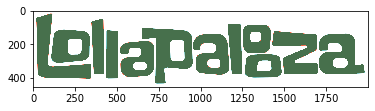

In [21]:
lolla_mask = Image.open('img/logo-lolla_clean.png')
nd_lolla_mask = (np.array(lolla_mask) > 0)*255
plt.imshow(lolla_mask)

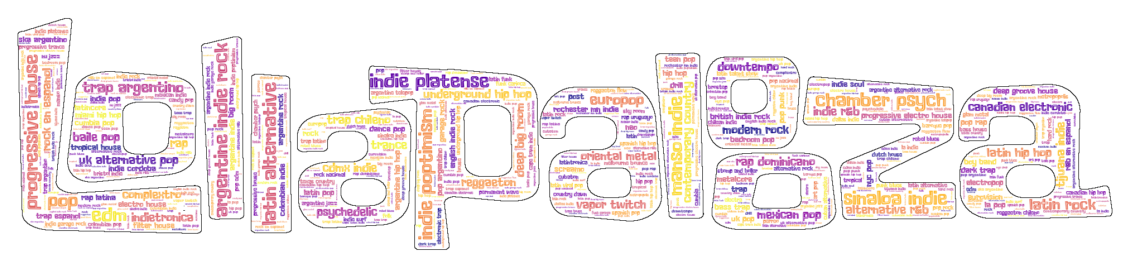

In [22]:
cv = CountVectorizer(token_pattern=r'((?:\w\s?&?)+)-?')
genres = cv.fit_transform(df_artists['genres'].map(lambda x: '-'.join(x)))
genres_freq = pd.DataFrame(genres.todense(),
                           index=df_artists.index, columns=cv.vocabulary_).T.sum(axis=1).to_dict()


# Generate wordcloud
wordcloud = WordCloud(width=1200, height=600, colormap='plasma',
                      background_color='white', font_path='./Lolapeluza-Font/Lolapeluza-Regular.ttf',
                      collocations=False, mask=nd_lolla_mask, contour_width=1, max_words = 1000, repeat=True).generate_from_frequencies(genres_freq)

# Visualize wordcloud
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Genres wordcloud per day

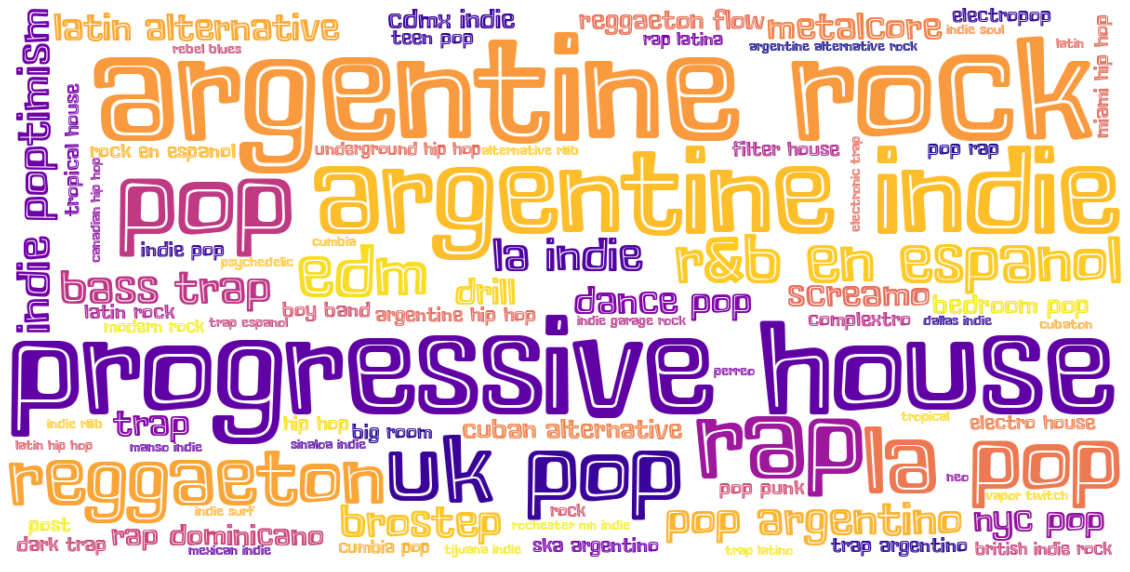

In [23]:
# Day 1
genres_day_1 = cv.fit_transform(df_artists.loc[df_artists['day'] == 1, 'genres'].map(lambda x: '-'.join(x)))
genres_day_1_freq = pd.DataFrame(genres_day_1.todense(),
                                 index=df_artists.loc[df_artists['day'] == 1].index,
                                 columns=cv.vocabulary_).T.sum(axis=1).to_dict()
genres_day_1_freq['rap'] += 3
genres_day_1_freq['progressive house'] += 5

# Generate wordcloud
wordcloud = WordCloud(width=1200, height=600, colormap='plasma',
                      background_color='white', font_path='./Lolapeluza-Font/Lolapeluza-Regular.ttf',
                      collocations=False).generate_from_frequencies(genres_day_1_freq)

# Visualize wordcloud
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

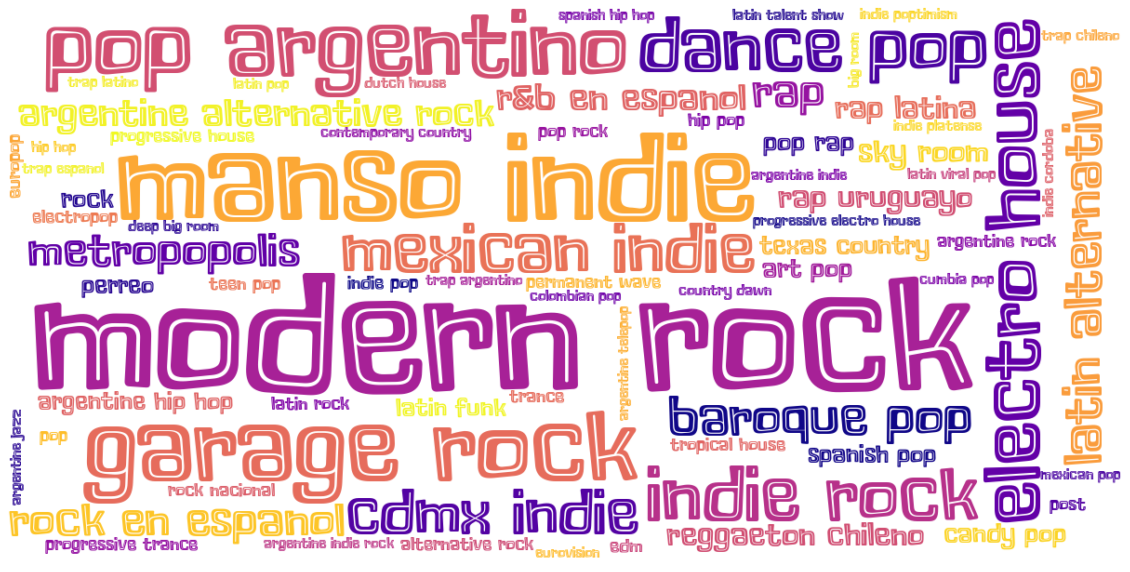

In [24]:
# Day 2
genres_day_2 = cv.fit_transform(df_artists.loc[df_artists['day'] == 2, 'genres'].map(lambda x: '-'.join(x)))
genres_day_2_freq = pd.DataFrame(genres_day_2.todense(),
                                 index=df_artists.loc[df_artists['day'] == 2].index,
                                 columns=cv.vocabulary_).T.sum(axis=1).to_dict()

# Generate wordcloud
wordcloud = WordCloud(width=1200, height=600, colormap='plasma',
                      background_color='white', font_path='./Lolapeluza-Font/Lolapeluza-Regular.ttf',
                      collocations=False).generate_from_frequencies(genres_day_2_freq)

# Visualize wordcloud
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

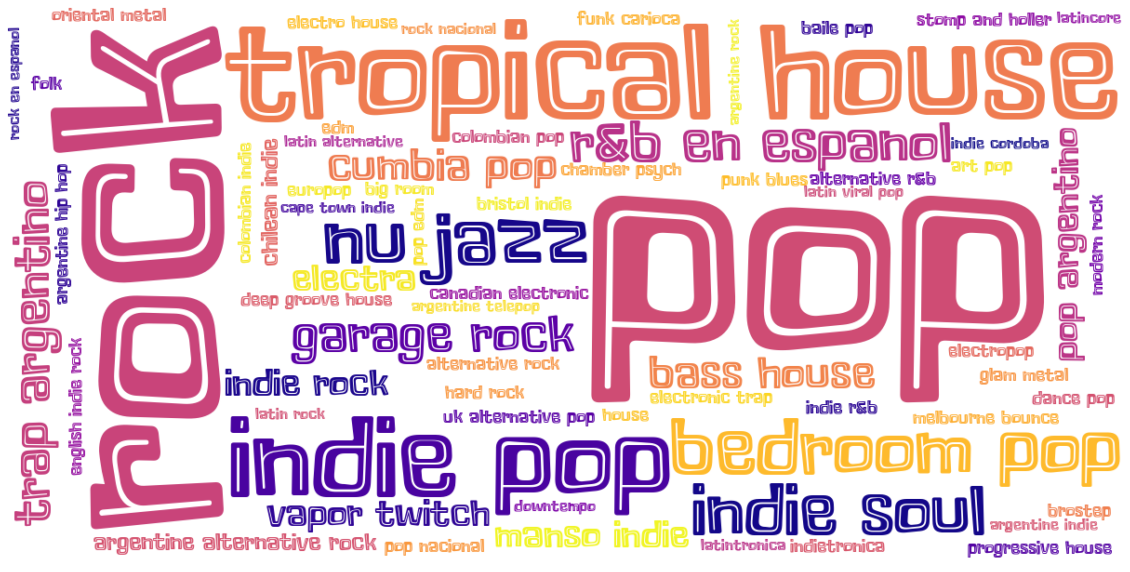

In [25]:
# Day 3
genres_day_3 = cv.fit_transform(df_artists.loc[df_artists['day'] == 3, 'genres'].map(lambda x: '-'.join(x)))
genres_day_3_freq = pd.DataFrame(genres_day_3.todense(),
                                 index=df_artists.loc[df_artists['day'] == 3].index,
                                 columns=cv.vocabulary_).T.sum(axis=1).to_dict()

# Generate wordcloud
wordcloud = WordCloud(width=1200, height=600, colormap='plasma',
                      background_color='white', font_path='./Lolapeluza-Font/Lolapeluza-Regular.ttf',
                      collocations=False).generate_from_frequencies(genres_day_3_freq)

# Visualize wordcloud
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Analysis of tracks' audio features

In [26]:
df_tracks = pd.read_csv('tracks.csv', index_col='track')
df_tracks.head()

artist  acousticness  \
track                                                
3eekarcy7kvN4yt5ZFzltW  Travis Scott       0.05460   
7h0d2h0fUmzbs7zeFigJPn  Travis Scott       0.05670   
2xLMifQCjDGFmkHkpNLD9h  Travis Scott       0.00513   
6gBFPUFcJLzWGx4lenP6h2  Travis Scott       0.08470   
4ea9w8c4ROqiZpJVhfBA3m  Travis Scott       0.18800   

                                                             analysis_url  \
track                                                                       
3eekarcy7kvN4yt5ZFzltW  https://api.spotify.com/v1/audio-analysis/3eek...   
7h0d2h0fUmzbs7zeFigJPn  https://api.spotify.com/v1/audio-analysis/7h0d...   
2xLMifQCjDGFmkHkpNLD9h  https://api.spotify.com/v1/audio-analysis/2xLM...   
6gBFPUFcJLzWGx4lenP6h2  https://api.spotify.com/v1/audio-analysis/6gBF...   
4ea9w8c4ROqiZpJVhfBA3m  https://api.spotify.com/v1/audio-analysis/4ea9...   

                        danceability  duration_ms  energy  instrumentalness  \
track                                                                         
3eekarcy7kvN4yt5ZFzltW         0.598       175721   0.427          0.000006   
7h0d2h0fUmzbs7zeFigJPn         0.559       244874   0.491          0.000000   
2xLMifQCjDGFmkHkpNLD9h         0.834       312820   0.730          0.000000   
6gBFPUFcJLzWGx4lenP6h2         0.841       243837   0.728          0.000000   
4ea9w8c4ROqiZpJVhfBA3m         0.845       279907   0.631          0.000000   

                        key  liveness  loudness  mode  speechiness    tempo  \
track                                                                         
3eekarcy7kvN4yt5ZFzltW    7    0.2100    -8.764     0       0.0317   76.469   
7h0d2h0fUmzbs7zeFigJPn    2    0.0992    -6.406     0       0.0346  153.131   
2xLMifQCjDGFmkHkpNLD9h    8    0.1240    -3.714     1       0.2220  155.008   
6gBFPUFcJLzWGx4lenP6h2    7    0.1490    -3.370     1       0.0484  130.049   
4ea9w8c4ROqiZpJVhfBA3m    7    0.0806    -8.206     0       0.2160  111.983   

                        time_signature  \
track                                    
3eekarcy7kvN4yt5ZFzltW               4   
7h0d2h0fUmzbs7zeFigJPn               4   
2xLMifQCjDGFmkHkpNLD9h               4   
6gBFPUFcJLzWGx4lenP6h2               4   
4ea9w8c4ROqiZpJVhfBA3m               4   

                                                               track_href  \
track                                                                       
3eekarcy7kvN4yt5ZFzltW  https://api.spotify.com/v1/tracks/3eekarcy7kvN...   
7h0d2h0fUmzbs7zeFigJPn  https://api.spotify.com/v1/tracks/7h0d2h0fUmzb...   
2xLMifQCjDGFmkHkpNLD9h  https://api.spotify.com/v1/tracks/2xLMifQCjDGF...   
6gBFPUFcJLzWGx4lenP6h2  https://api.spotify.com/v1/tracks/6gBFPUFcJLzW...   
4ea9w8c4ROqiZpJVhfBA3m  https://api.spotify.com/v1/tracks/4ea9w8c4ROqi...   

                                  type                                   uri  \
track                                                                          
3eekarcy7kvN4yt5ZFzltW  audio_features  spotify:track:3eekarcy7kvN4yt5ZFzltW   
7h0d2h0fUmzbs7zeFigJPn  audio_features  spotify:track:7h0d2h0fUmzbs7zeFigJPn   
2xLMifQCjDGFmkHkpNLD9h  audio_features  spotify:track:2xLMifQCjDGFmkHkpNLD9h   
6gBFPUFcJLzWGx4lenP6h2  audio_features  spotify:track:6gBFPUFcJLzWGx4lenP6h2   
4ea9w8c4ROqiZpJVhfBA3m  audio_features  spotify:track:4ea9w8c4ROqiZpJVhfBA3m   

                        valence  
track                            
3eekarcy7kvN4yt5ZFzltW   0.0605  
7h0d2h0fUmzbs7zeFigJPn   0.1140  
2xLMifQCjDGFmkHkpNLD9h   0.4460  
6gBFPUFcJLzWGx4lenP6h2   0.4300  
4ea9w8c4ROqiZpJVhfBA3m   0.5450

Meaning of audio features that will be analyzed, according to [official documentation](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/):

- *acousticness* - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- *danceability* - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- *energy* - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- *instrumentalness* - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- *loudness* - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 dB.

- *speechiness* - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- *tempo* - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- *valence* - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry) .

Compute the mean values of each audio feature over the top tracks of an artist

In [27]:
audio_feats = ['energy', 'danceability', 'valence', 'instrumentalness', 
               'acousticness', 'speechiness', 'tempo', 'loudness']

In [28]:
artists_audio_feats = df_tracks[['artist']+audio_feats].groupby('artist').mean()
artists_audio_feats.head()

energy  danceability  valence  instrumentalness  \
artist                                                               
A Day to Remember  0.9079        0.4463  0.45260          0.000011   
AJR                0.6378        0.5945  0.55540          0.000000   
Ainda              0.2828        0.5976  0.39895          0.002467   
Airbag             0.7816        0.4371  0.40930          0.003491   
Alan Walker        0.6822        0.5669  0.34620          0.000240   

                   acousticness  speechiness     tempo  loudness  
artist                                                            
A Day to Remember      0.012092      0.09965  147.1963   -3.9737  
AJR                    0.166270      0.07905  125.0487   -5.3318  
Ainda                  0.754100      0.04014  126.8930  -11.4613  
Airbag                 0.033316      0.04284  117.2577   -4.7051  
Alan Walker            0.206840      0.05304  132.7670   -5.5393

Standarize features in order to plot them in the same scale

In [29]:
min_max_scaler = MinMaxScaler()
artists_audio_feats = pd.DataFrame(min_max_scaler.fit_transform(artists_audio_feats[audio_feats]),
                                   index=artists_audio_feats.index, columns=audio_feats)
artists_audio_feats = artists_audio_feats.join(df_artists['day'])

In [30]:
artists_audio_feats.head()

energy  danceability   valence  instrumentalness  \
artist                                                                  
A Day to Remember  0.906468      0.160590  0.403958          0.000027   
AJR                0.514791      0.492060  0.566962          0.000000   
Ainda              0.000000      0.498994  0.318888          0.005932   
Airbag             0.723318      0.140013  0.335300          0.008395   
Alan Walker        0.579176      0.430329  0.235246          0.000576   

                   acousticness  speechiness     tempo  loudness  day  
artist                                                                 
A Day to Remember      0.013834     0.225328  0.809269  0.916746    1  
AJR                    0.218744     0.158828  0.475245  0.789503    1  
Ainda                  1.000000     0.033218  0.503060  0.215219    2  
Airbag                 0.042041     0.041934  0.357743  0.848219    3  
Alan Walker            0.272664     0.074862  0.591650  0.770062    3

In [74]:
type(int(artists_audio_feats.loc[artist, 'day']))

int

In [84]:
fig = make_subplots(rows=3, cols=1, 
                    specs=[[{'type':'polar'}]]*3,
                    subplot_titles=[f'Day {n}' for n in range(1,4)],
                    vertical_spacing=0.05)

for artist in artists_audio_feats.index:
    fig.add_trace(go.Scatterpolar(r=artists_audio_feats.loc[artist, 'energy':'loudness'],
                                  theta=artists_audio_feats.columns[:-1],
                                  hovertemplate="%{theta}: %{r:.2f}",
                                  fill='toself',
                                  name=f'{artist}',
                                  meta=artists_audio_feats.loc[artist, 'day']
                                 ),
                  row=int(artists_audio_feats.loc[artist, 'day']), col=1
                 )


fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0,1])),
                  showlegend=True, title={'text':'Audio features radar', 'x':0.5},
                  width = 1000, height = 1500)
for annotation in fig.layout.annotations:
    annotation.x = 0

fig.show(config=dict(displayModeBar=False))

For online plotting

```python
from chart_studio.tools import set_credentials_file
from chart_studio.plotly import plot
set_credentials_file(username='USERNAME', api_key='API_KEY')

fig = go.Figure()

for artist in artists_audio_feats.index:
    fig.add_trace(go.Scatterpolar(r=artists_audio_feats.loc[artist, 'energy':'loudness'],
                                  theta=artists_audio_feats.columns[:-1],
                                  hovertemplate="%{theta}: %{r:.2f}",
                                  fill='toself',
                                  name=f'{artist}',
                                  meta=artists_audio_feats.loc[artist, 'day']))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0,1])),
                  showlegend=True, title={'text':'Audio features radar', 'x':0.5},)

plot(fig, filename='Audio features radar')
```

---

## Artist Clustering

Based on audio features

In [32]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=4, random_state=42)
artists_audio_feats['cluster'] = k_means.fit_predict(artists_audio_feats)

In [33]:
for k in range(k_means.n_clusters):
    print(f'Cluster {k}:\n', artists_audio_feats.loc[artists_audio_feats['cluster'] == k].index, '\n')

Cluster 0:
 Index(['Ainda', 'Amaia', 'Fabiana Cantilo', 'Girl Ultra', 'Kacey Musgraves',
       'Litto Nebbia', 'Louly', 'Paco Leiva', 'Zoe Gotusso'],
      dtype='object', name='artist') 

Cluster 1:
 Index(['A Day to Remember', 'AJR', 'Alejo y Valentin', 'Axel Fiks', 'Bizarrap',
       'Boombox Cartel', 'Brockhampton', 'Cimafunk', 'DJ Sky', 'DUKI', 'Dani',
       'Denzel Curry', 'Feli Colina', 'Fuego', 'J mena', 'Kaydy Cain',
       'King Princess', 'LP', 'La Delio Valdez', 'Los Fabulosos Cadillacs',
       'Louta', 'Lucia Tacchetti', 'Madeon', 'Martin Garrix', 'Maye',
       'Ms Nina', 'Nathy Peluso', 'Rita Ora', 'Travis Scott', 'Two Feet',
       'WOS', 'Yungblud'],
      dtype='object', name='artist') 

Cluster 2:
 Index(['Airbag', 'Alan Walker', 'Cage the Elephant', 'Chris Lake', 'DABOW',
       'El Buen Salvaje', 'Elsa y Elmar', 'Emilia', 'Florian', 'Goldfish',
       'Guns N’ Roses', 'Idles', 'James Blake', 'Lana del Rey', 'Lauv', 'MIKA',
       'Masego', 'Miranda Johansen', 'N

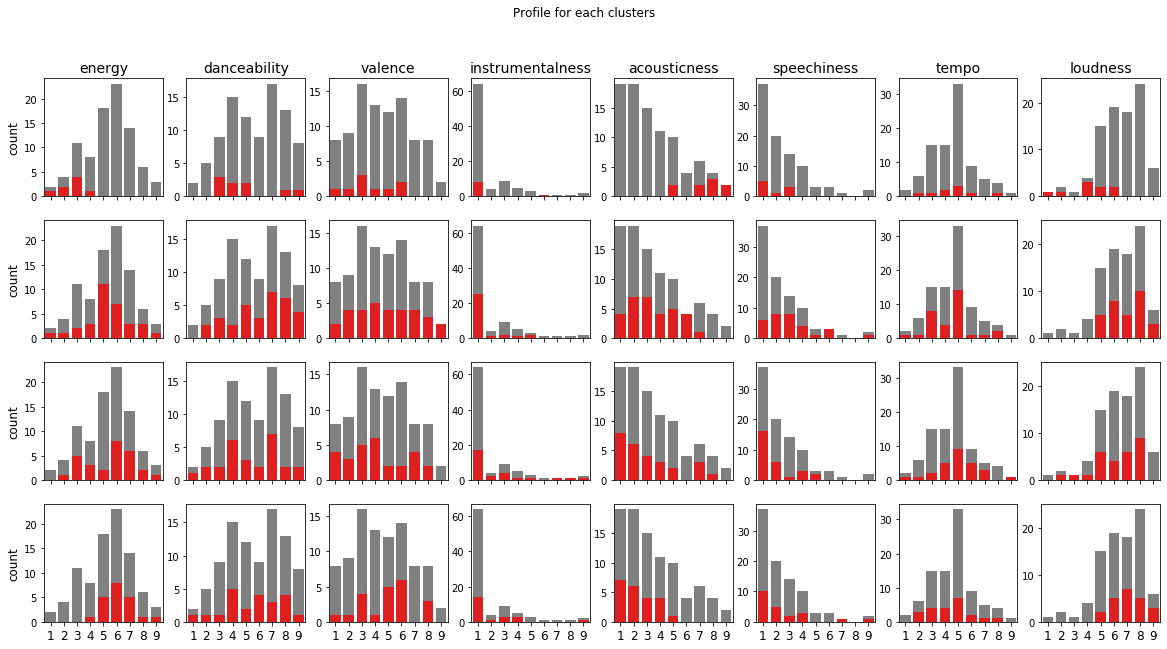

In [34]:
import seaborn as sns
# adapted from https://towardsdatascience.com/profiling-my-favorite-songs-on-spotify-through-clustering-33fee591783d

# set binning intervals of 0.1
bins = np.linspace(0,1,10)

# create subplots for number of clusters(Rows) and features(Cols)
num_clusters = k_means.n_clusters
num_features = len(audio_feats)

f, axes = plt.subplots(num_clusters, num_features, 
                       figsize=(20, 10), sharex='col')

# initialise 1st row. Representing cluster
row = 0

for cluster in np.sort(artists_audio_feats['cluster'].unique()):

#filter cluster dataframe and reset column to 0 for 1st plot for the cluster
    df_cluster = artists_audio_feats[artists_audio_feats['cluster'] == cluster]
    col = 0
    
    for feature in audio_feats:
#       create binned count for all artist df and clustered df
        art_grp = artists_audio_feats.groupby(pd.cut(artists_audio_feats[feature], bins)).size()\
                                                                                         .reset_index(name='count')
        cluster_grp = df_cluster.groupby(pd.cut(df_cluster[feature], bins)).size().reset_index(name='count')
        
#       plot overall distribution and cluster distribution on the ax
        sns.barplot(data=art_grp, x=feature, y='count', 
                    color='grey', ax=axes[row, col])
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='red', ax=axes[row, col])
        
#       configure ax
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1,10), fontsize=12)
        if col > 0:
            axes[row, col].set_ylabel('')
        else:
            axes[row, col].set_ylabel('count', fontsize=12)
        if row == 0:
            axes[row, col].set_title(feature, fontsize=14)        
        col += 1
    row += 1
    
f.suptitle('Profile for each clusters')
    
plt.show()

Based on genres and related artists

In [35]:
rel_genres_cols = [rel_genre for rel_genre in df_artists.columns if 'related_genre:' in rel_genre]
rel_artist_cols = [rel_artist for rel_artist in df_artists.columns if 'related_artist:' in rel_artist]
cluster_data = df_artists.drop(['artist_id', 'followers', 'popularity', 'albums',
                                'genres', 'related_artists', 'related_genres', 'day',
                                'first_release', 'top_tracks']+ rel_artist_cols, axis=1)

In [36]:
cluster_data.head()

genre: alternative r&b  genre: alternative rock  \
artist                                                                     
Travis Scott                                  0                        0   
Martin Garrix                                 0                        0   
Los Fabulosos Cadillacs                       0                        0   
Brockhampton                                  0                        0   
DUKI                                          0                        0   

                         genre: argentine alternative rock  \
artist                                                       
Travis Scott                                             0   
Martin Garrix                                            0   
Los Fabulosos Cadillacs                                  0   
Brockhampton                                             0   
DUKI                                                     0   

                         genre: argentine hip hop  genre: argentine indie  \
artist                                                                      
Travis Scott                                    0                       0   
Martin Garrix                                   0                       0   
Los Fabulosos Cadillacs                         0                       0   
Brockhampton                                    0                       0   
DUKI                                            1                       0   

                         genre: argentine indie rock  genre: argentine jazz  \
artist                                                                        
Travis Scott                                       0                      0   
Martin Garrix                                      0                      0   
Los Fabulosos Cadillacs                            0                      0   
Brockhampton                                       0                      0   
DUKI                                               0                      0   

                         genre: argentine rock  genre: argentine telepop  \
artist                                                                     
Travis Scott                                 0                         0   
Martin Garrix                                0                         0   
Los Fabulosos Cadillacs                      1                         0   
Brockhampton                                 0                         0   
DUKI                                         0                         0   

                         genre: art pop  ...  related_genre: bboy  \
artist                                   ...                        
Travis Scott                          0  ...                  0.0   
Martin Garrix                         0  ...                  0.0   
Los Fabulosos Cadillacs               0  ...                  0.0   
Brockhampton                          0  ...                  0.0   
DUKI                                  0  ...                  0.0   

                         related_genre: south african hip hop  \
artist                                                          
Travis Scott                                              0.0   
Martin Garrix                                             0.0   
Los Fabulosos Cadillacs                                   0.0   
Brockhampton                                              0.0   
DUKI                                                      0.0   

                         related_genre: minimal tech house  \
artist                                                       
Travis Scott                                           0.0   
Martin Garrix                                          0.0   
Los Fabulosos Cadillacs                                0.0   
Brockhampton                                           0.0   
DUKI                                                   0.0   

                         related_genre: filter house  \

In [37]:
from sklearn.preprocessing import Normalizer
scaler = StandardScaler()
normalizer = Normalizer()

cluster_data_std = scaler.fit_transform(cluster_data)
cluster_data_l2 = normalizer.fit_transform(cluster_data)

In [38]:
dist =  1 - cosine_similarity(cluster_data_l2)

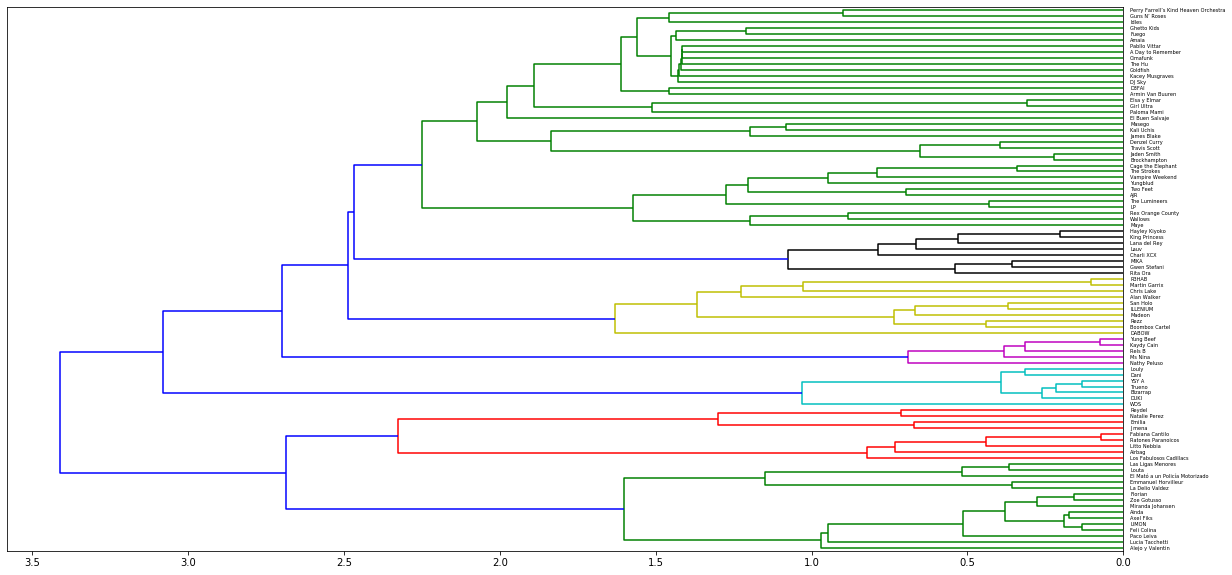

In [39]:
linkage_matrix = linkage(dist, method='average')
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, orientation='left', labels=df_artists.index)
plt.savefig('dendrogram.svg');

## Viz

In [110]:
import plotly.graph_objects as go
from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [107]:
tsne = TSNE(random_state=2)
tsne_plot = tsne.fit_transform(cluster_data_l2)

In [108]:
dbscan = DBSCAN(eps=15, min_samples=3)
dbscan.fit(tsne_plot)
print('Found {} clusters'.format(len(np.unique(dbscan.labels_))-1))

Found 5 clusters


In [109]:
data = []
hovertext_base = '<b>{}</b><br>Géneros:{}<br>Día {}'
hovertext = [hovertext_base.format(name, genres, day) for (name, genres, day) in zip(df_artists.index, df_artists['genres'], df_artists['day'])]
 
for label in np.unique(dbscan.labels_):
    trace = go.Scatter(x=tsne_plot[dbscan.labels_ == label,0], y=tsne_plot[dbscan.labels_ == label,1], 
                       mode='markers', 
#                        marker=dict(color=dbscan.labels_),
                       hoverinfo='text',
                       hovertext=hovertext,
                       name = 'Noise' if label == -1 else f'Cluster {label}'
                      )
    data.append(trace)
fig = go.Figure(data=data, )

fig.show()

In [112]:
iso = Isomap()
iso_plot = iso.fit_transform(cluster_data_l2)

In [115]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(iso_plot)
print('Found {} clusters'.format(len(np.unique(dbscan.labels_))-1))

Found 7 clusters


In [116]:
data = []
hovertext_base = '<b>{}</b><br>Géneros:{}<br>Día {}'
hovertext = [hovertext_base.format(name, genres, day) for (name, genres, day) in zip(df_artists.index, df_artists['genres'], df_artists['day'])]
 
for label in np.unique(dbscan.labels_):
    trace = go.Scatter(x=iso_plot[dbscan.labels_ == label,0], y=iso_plot[dbscan.labels_ == label,1], 
                       mode='markers', 
#                        marker=dict(color=dbscan.labels_),
                       hoverinfo='text',
                       hovertext=hovertext,
                       name = 'Noise' if label == -1 else f'Cluster {label}'
                      )
    data.append(trace)
fig = go.Figure(data=data, )

fig.show()